In [1]:
import healpy
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams.update({'figure.figsize': (12, 8), 'font.size': 16})

In [2]:
haslam_dsds = healpy.fitsfunc.read_map("./lambda_haslam408_dsds.fits")
haslam_nofilt = healpy.fitsfunc.read_map("./lambda_haslam408_nofilt.fits")

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/tristpinsm/.local/lib/python2.7/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


Ordering converted to RING


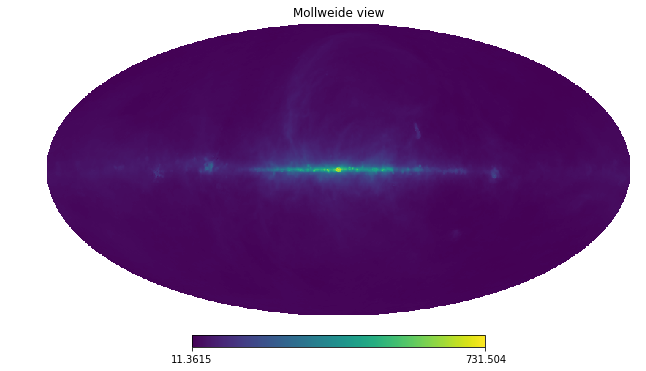

In [12]:
healpy.visufunc.mollview(haslam_dsds)

Sigma is 64.814230 arcmin (0.018854 rad) 
-> fwhm is 152.625849 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


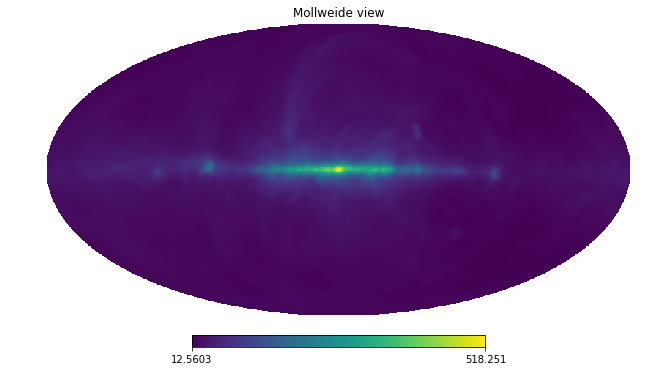

In [16]:
healpy.visufunc.mollview(healpy.sphtfunc.smoothing(haslam_dsds, sigma=3e2/408./20./1.95))

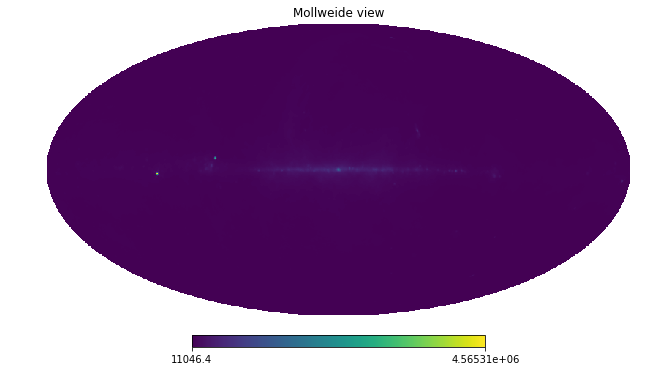

In [4]:
healpy.visufunc.mollview(haslam_nofilt)

In [18]:
class ModelVis(object):
    c = 2.99792458e2
    
    def __init__(self, fname="./lambda_haslam408_dsds.fits", freq=408.):
        self.freq = freq
        self.wl = self.c / freq

        self.basemap = healpy.fitsfunc.read_map(fname)
        self.smoothmap = healpy.sphtfunc.smoothing(self.basemap, sigma=np.radians(self.res()))

    def set_baselines(baselines=None):
        if type(baselines) is np.ndarray:
            self.baselines = baselines
        elif type(baselines) is int or type(baselines) is float:
            # generate them
            pass
    
    def get_vis(self, ra, dec):
        # use this to check/visualize model
        # transform RA/dec to galactic coordinates
        # construct visibility matrix at every RA by summing over declinations
        pass
        
    def fit_beam(self, vis, weight, n, return_basis=False):
        # evaluate Haslam map at n declinations and all times
        # generate basis functions and linear least squares solution
        # return basis functions and beam parameters
        pass
    
    def _res(self):
        # match FWHM of sinc for 20m aperture
        return self.lam / 20. / 1.95

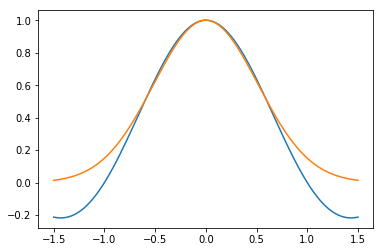

In [9]:
x = np.linspace(-1.5, 1.5, 200)
plt.plot(x, np.sin(np.pi * x)/(np.pi*x))
plt.plot(x, np.exp(-0.5*x**2 / (0.5137)**2))